In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"])

In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1

In [15]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [16]:
df.duplicated().sum()

np.int64(543)

In [17]:
df = df.drop_duplicates()
print(df.shape)

(6362077, 8)


EDA

Class Balance

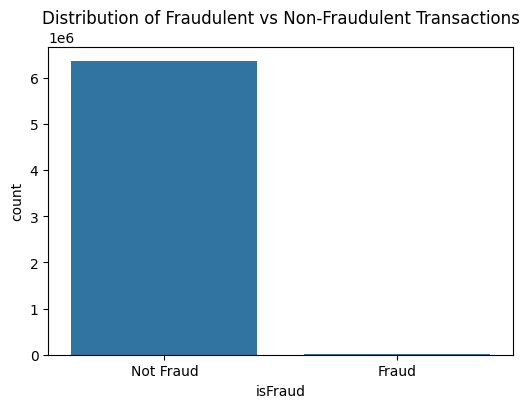

In [19]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()




Transaction Type Distribution

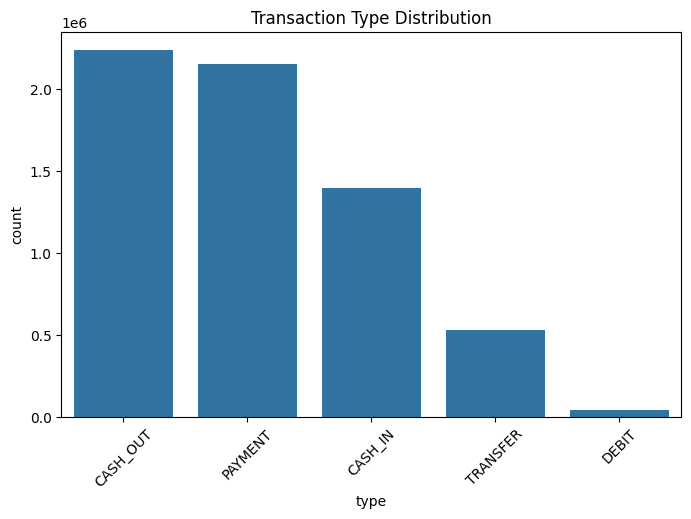

In [20]:
# Transaction type distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)
plt.show()


Fraud Rate by Transaction Type

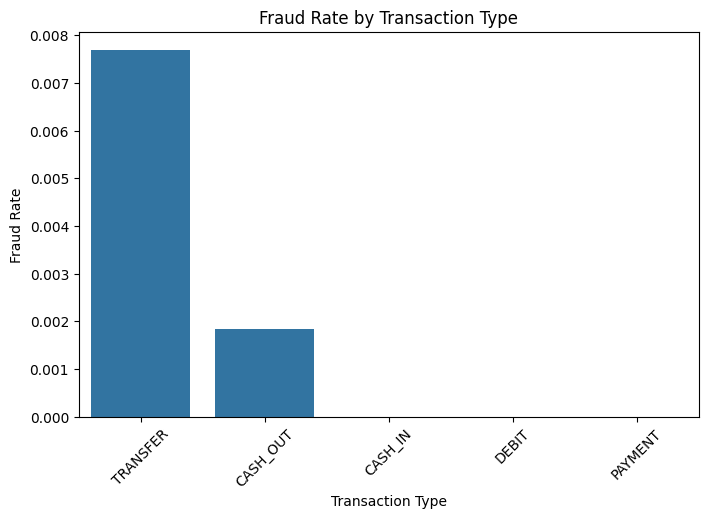

In [21]:
fraud_by_type = df.groupby("type")["isFraud"].mean().reset_index()
fraud_by_type = fraud_by_type.sort_values("isFraud", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="type", y="isFraud", data=fraud_by_type)
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.show()


Distribution of amount (Log Scale)

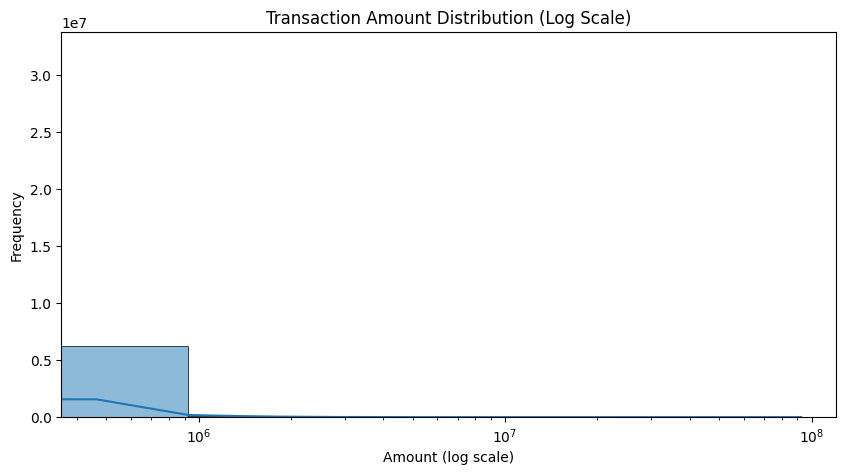

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=100, kde=True)
plt.xscale('log')
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount (log scale)")
plt.ylabel("Frequency")
plt.show()


 Boxplot: Fraud vs. Non-Fraud Amounts

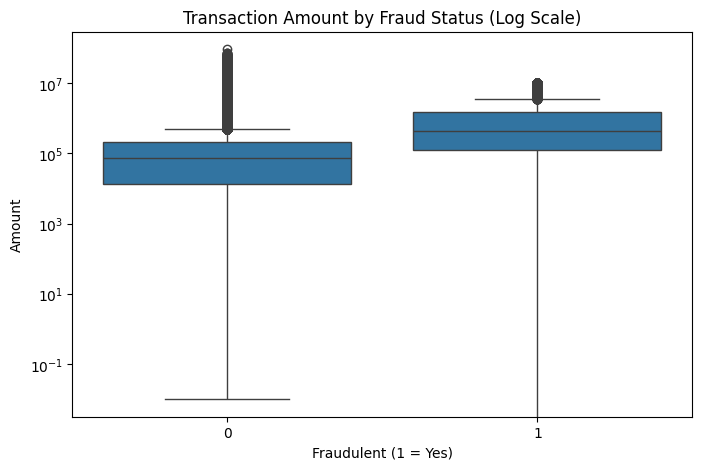

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.yscale("log")
plt.title("Transaction Amount by Fraud Status (Log Scale)")
plt.xlabel("Fraudulent (1 = Yes)")
plt.ylabel("Amount")
plt.show()


Balance Behavior – Before and After Transaction

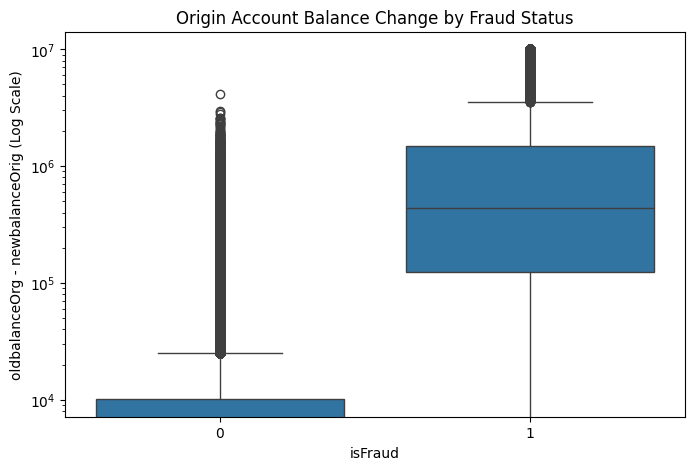

In [24]:
# Difference in Origin Account Balances
df['orig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="orig_diff", data=df)
plt.yscale("log")
plt.title("Origin Account Balance Change by Fraud Status")
plt.xlabel("isFraud")
plt.ylabel("oldbalanceOrg - newbalanceOrig (Log Scale)")
plt.show()


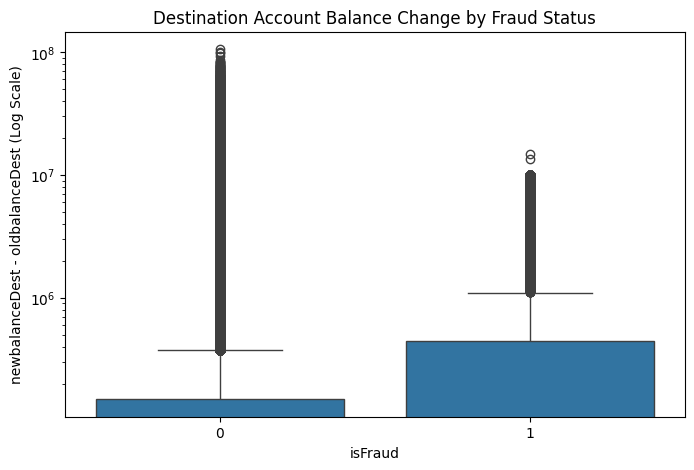

In [25]:
# Difference in Destination Account Balances

df['dest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="dest_diff", data=df)
plt.yscale("log")
plt.title("Destination Account Balance Change by Fraud Status")
plt.xlabel("isFraud")
plt.ylabel("newbalanceDest - oldbalanceDest (Log Scale)")
plt.show()


Correlation Matrix

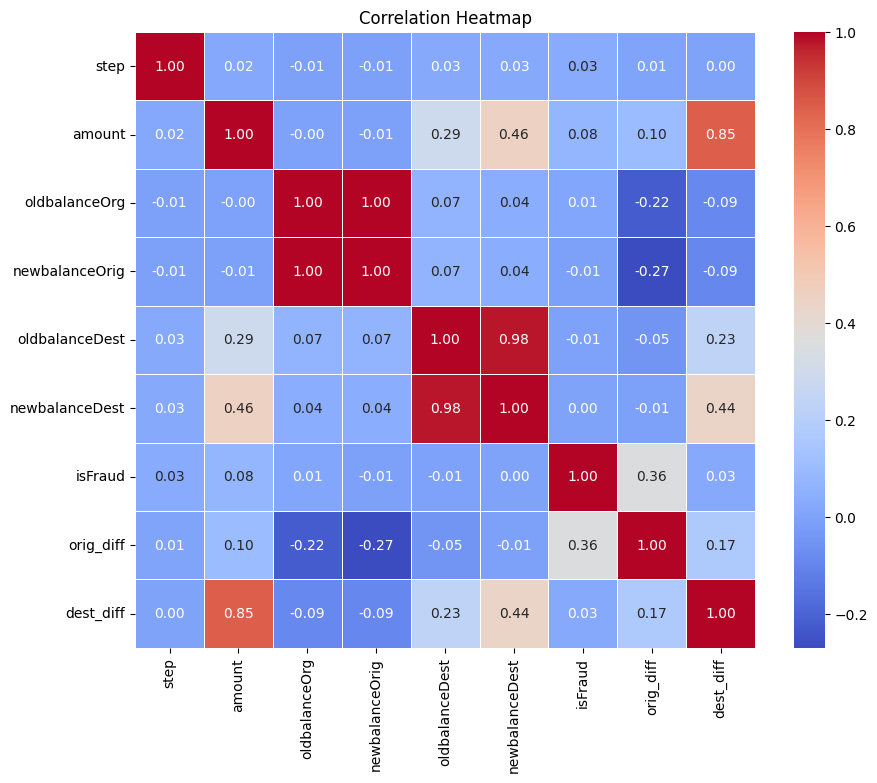

In [26]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Time-Based Patterns

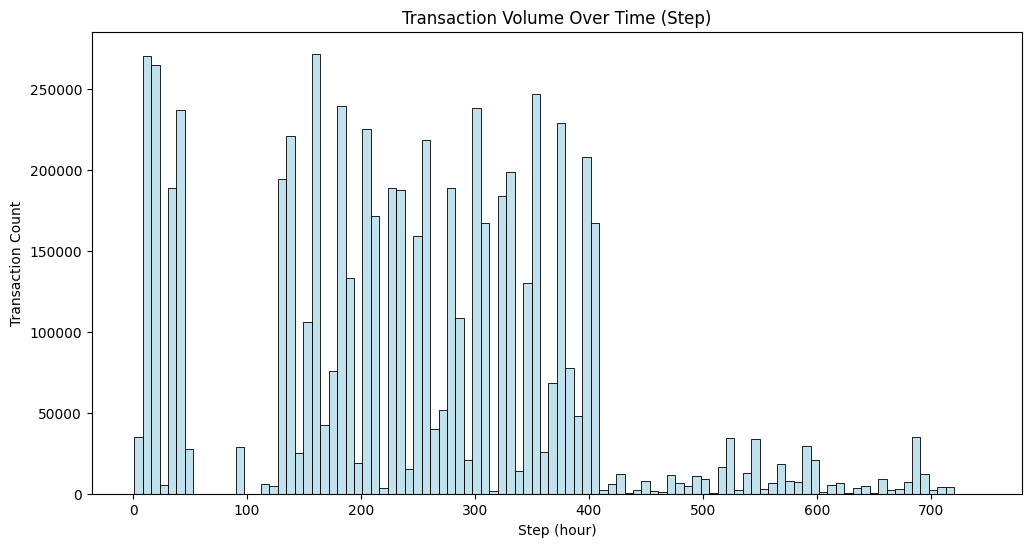

In [27]:
# Total Transactions per Hour
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="step", bins=100, color="lightblue")
plt.title("Transaction Volume Over Time (Step)")
plt.xlabel("Step (hour)")
plt.ylabel("Transaction Count")
plt.show()


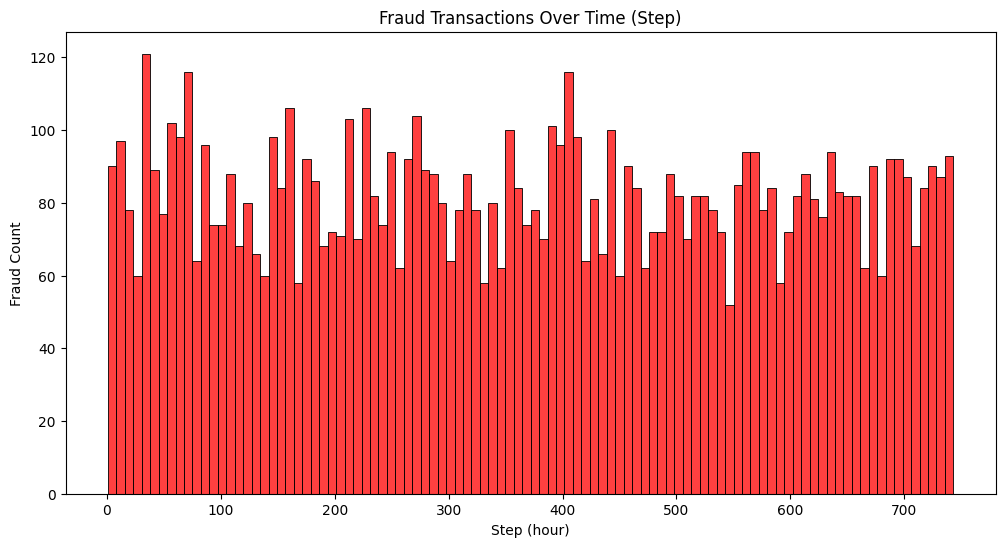

In [28]:
# Fraud Transactions per Hour
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df["isFraud"] == 1], x="step", bins=100, color="red")
plt.title("Fraud Transactions Over Time (Step)")
plt.xlabel("Step (hour)")
plt.ylabel("Fraud Count")
plt.show()


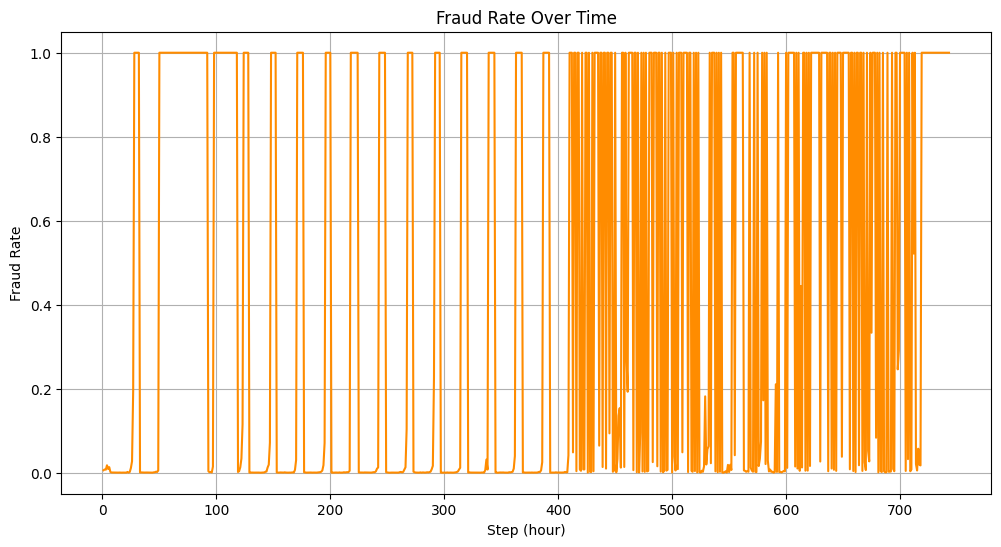

In [29]:
# Fraud Rate Over Time

fraud_by_step = df.groupby("step")["isFraud"].mean()

plt.figure(figsize=(12, 6))
fraud_by_step.plot(kind="line", color="darkorange")
plt.title("Fraud Rate Over Time")
plt.xlabel("Step (hour)")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.show()


In [32]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orig_diff,dest_diff
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [33]:
from sklearn.preprocessing import LabelEncoder

df_fe = df.copy()

le = LabelEncoder()
df_fe['type_encoded'] = le.fit_transform(df_fe['type'])

print(dict(zip(le.classes_, le.transform(le.classes_))))


{'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns to scale
cols_to_scale = [
    "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest",
    "orig_diff", "dest_diff"
]

scaler = MinMaxScaler()
df_fe[cols_to_scale] = scaler.fit_transform(df_fe[cols_to_scale])


In [38]:
df_fe["net_transaction_effect"] = df_fe["dest_diff"] - df_fe["orig_diff"]


In [39]:
df_fe.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orig_diff,dest_diff,type_encoded,net_transaction_effect
0,1,PAYMENT,0.000106,0.002855,0.003233,0.000000,0.0,0,0.161566,0.109987,3,-0.051579
1,1,PAYMENT,0.000020,0.000357,0.000391,0.000000,0.0,0,0.160897,0.109987,3,-0.050910
2,1,TRANSFER,0.000002,0.000003,0.000000,0.000000,0.0,1,0.160756,0.109987,4,-0.050769
3,1,CASH_OUT,0.000002,0.000003,0.000000,0.000059,0.0,1,0.160756,0.109809,1,-0.050947
4,1,PAYMENT,0.000126,0.000697,0.000603,0.000000,0.0,0,0.161720,0.109987,3,-0.051733


In [46]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df_fe[numeric_cols]))
outlier_flags = (z_scores > 3)
outlier_counts = outlier_flags.sum(axis=0)

print("Outlier count per column:\n", dict(zip(numeric_cols, outlier_counts)))


Outlier count per column:
 {'amount': 44953, 'oldbalanceOrg': 155117, 'newbalanceOrig': 155919, 'oldbalanceDest': 79838, 'newbalanceDest': 75163, 'orig_diff': 54615, 'dest_diff': 34220}


In [41]:
X = df_fe.drop(["type", "isFraud"], axis=1)
y = df_fe["isFraud"]

Split the data into train, valid, and test sets

In [47]:
from sklearn.model_selection import train_test_split

# train vs temp (which will be split into val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# temp → validation + test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


Check for Class Imbalance

In [48]:
def check_balance(split_name, y_split):
    counts = pd.Series(y_split).value_counts(normalize=True).sort_index()
    print(f"\n {split_name} distribution:")
    print(f"  Legit: {(counts[0]*100):.2f}%")
    print(f"  Fraud: {(counts[1]*100):.2f}%" if 1 in counts else "  Fraud: 0.00%")

check_balance("Train", y_train)
check_balance("Validation", y_val)
check_balance("Test", y_test)



 Train distribution:
  Legit: 99.87%
  Fraud: 0.13%

 Validation distribution:
  Legit: 99.87%
  Fraud: 0.13%

 Test distribution:
  Legit: 99.87%
  Fraud: 0.13%


Logistic Regression Model with Class Imbalance Handling

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on validation set
y_val_pred = log_reg.predict(X_val)
y_val_proba = log_reg.predict_proba(X_val)[:, 1]

# Evaluation
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("ROC AUC Score:", roc_auc_score(y_val, y_val_proba))


Classification Report (Validation):
              precision    recall  f1-score   support

           0     0.9998    0.9607    0.9799    953082
           1     0.0272    0.8512    0.0527      1230

    accuracy                         0.9606    954312
   macro avg     0.5135    0.9060    0.5163    954312
weighted avg     0.9985    0.9606    0.9787    954312

Confusion Matrix:
[[915620  37462]
 [   183   1047]]
ROC AUC Score: 0.9591189625926113


In [51]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)[:, 1]

# Classification Report
print("Classification Report (Validation):")
print(classification_report(y_val, rf_preds, digits=4))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, rf_preds))

# ROC AUC Score
roc_auc = roc_auc_score(y_val, rf_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report (Validation):
              precision    recall  f1-score   support

           0     1.0000    0.9979    0.9989    953082
           1     0.3707    0.9659    0.5357      1230

    accuracy                         0.9978    954312
   macro avg     0.6853    0.9819    0.7673    954312
weighted avg     0.9991    0.9978    0.9983    954312

Confusion Matrix:
[[951065   2017]
 [    42   1188]]
ROC AUC Score: 0.9996


In [52]:
from xgboost import XGBClassifier

# Define XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # Handle imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_val)
xgb_probs = xgb_model.predict_proba(X_val)[:, 1]

# Evaluation
print("Classification Report (Validation):")
print(classification_report(y_val, xgb_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_val, xgb_preds))

roc_auc = roc_auc_score(y_val, xgb_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (Validation):
              precision    recall  f1-score   support

           0     1.0000    0.9953    0.9977    953082
           1     0.2152    0.9927    0.3538      1230

    accuracy                         0.9953    954312
   macro avg     0.6076    0.9940    0.6757    954312
weighted avg     0.9990    0.9953    0.9968    954312

Confusion Matrix:
[[948630   4452]
 [     9   1221]]
ROC AUC Score: 0.9997


In [53]:
xgb_results = X_val.copy()
xgb_results["isFraud_actual"] = y_val.values
xgb_results["isFraud_predicted"] = xgb_preds
xgb_results["fraud_probability"] = xgb_probs


xgb_results.reset_index(drop=True, inplace=True)


xgb_results.to_csv("xgboost_fraud_predictions.csv", index=False)


In [54]:
from google.colab import files
files.download("xgboost_fraud_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
xgb_results.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_diff,dest_diff,type_encoded,net_transaction_effect,isFraud_actual,isFraud_predicted,fraud_probability
0,692,0.002244,0.010385,0.016664,0.000656,0.000073,0.143329,0.108240,0,-0.035089,0,0,0.000052
1,324,0.000670,0.000000,0.000000,0.004518,0.004690,0.160741,0.110509,1,-0.050232,0,0,0.001005
2,230,0.002112,0.000360,0.004370,0.001718,0.001169,0.144356,0.108343,0,-0.036013,0,0,0.000029
3,308,0.000835,0.000000,0.000000,0.001792,0.002008,0.160741,0.110637,1,-0.050104,0,0,0.000830
4,156,0.000022,0.000000,0.000000,0.000000,0.000000,0.160741,0.109987,3,-0.050754,0,0,0.000304
